In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

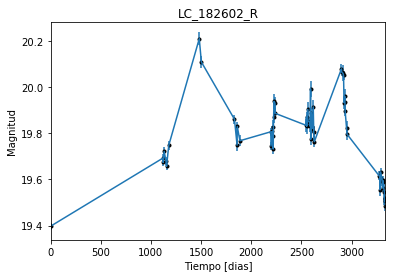

In [4]:
data = np.genfromtxt('LC_182602_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_182602_R')
plt.savefig("LC_182602_R.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

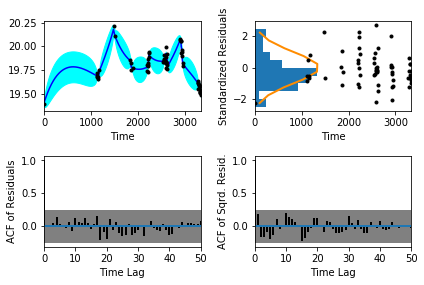

In [6]:
sample.assess_fit()

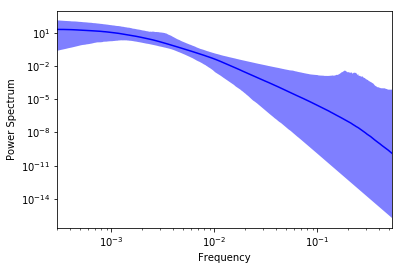

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

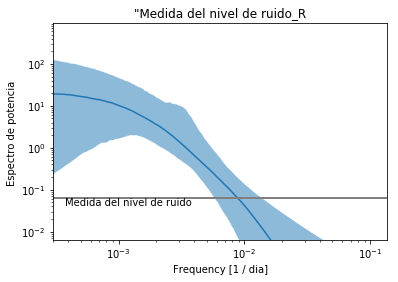

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_182602_R')
plt.title('"Medida del nivel de ruido_R')
plt.savefig("Medida del nivel de ruido_R.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_182602_R')

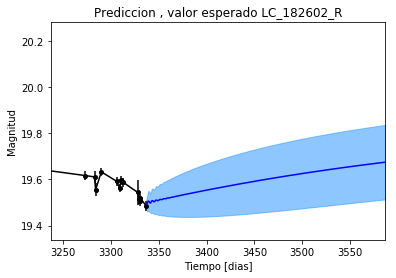

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_182602_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_182602_R')

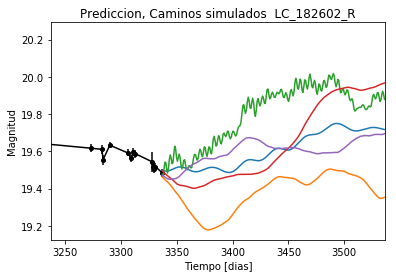

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_182602_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


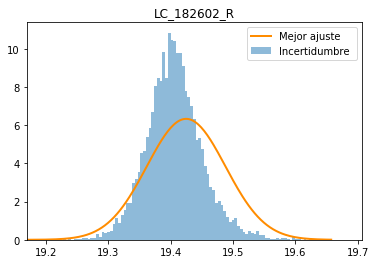

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_182602_R')
plt.savefig("Mejor_ajuste_LC_182602_R.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_182602_R')

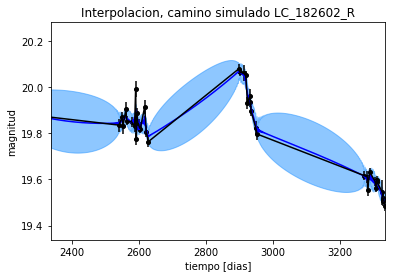

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_182602_R')

Text(0.5,1,'Interpolacion, camino simulado LC_182602_R')

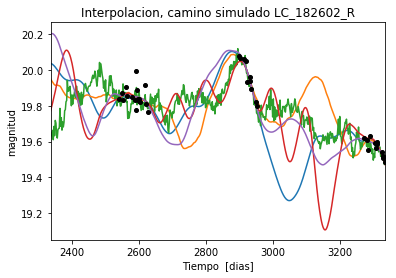

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_182602_R')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 814.806087713
Median: 0.0102679395935
Standard deviation: 0.177624014925
68% credibility interval: [ 0.00087831  0.13323799]
95% credibility interval: [  3.62008104e-04   7.19452432e-01]
99% credibility interval: [  3.13623253e-04   1.00597323e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 1058.02570022
Median: 0.00226540914403
Standard deviation: 0.0702329592585
68% credibility interval: [ 0.00050667  0.02866193]
95% credibility interval: [ 0.00032558  0.21164628]
99% credibility interval: [  3.05575347e-04   4.86651528e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 187.479462895
Median: 0.015129483472
Standard d

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 323.221129487
Median: 108.754940935
Standard deviation: 1.68020588992
68% credibility interval: [ 107.02280198  109.91689763]
95% credibility interval: [ 104.72285979  111.92452221]
99% credibility interval: [ 102.48569941  112.44552757]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 910.410998634
Median: 0.528184693789
Standard deviation: 2.09593037433
68% credibility interval: [ 0.07940387  3.69959274]
95% credibility interval: [ 0.02192722  6.95942033]
99% credibility interval: [ 0.01407961  9.87729364]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 400.184411506
Median: 0.515598942241
Standard deviation: 8.28272565517
68% credibility interval: [ 0.01125398  7.01960885]
95% credibility interval: [  1.34369663e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1600.45022794
Median: 4.78397857526e-13
Standard deviation: 3.13985303413e+83
68% credibility interval: [  3.28117855e-43   5.35564351e+46]
95% credibility interval: [  2.93063418e-84   2.43657157e+76]
99% credibility interval: [  8.70644214e-90   4.40105770e+79]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 658.171403094
Median: 19.7743480888
Standard deviation: 0.119462369651
68% credibility interval: [ 19.66102561  19.85142334]
95% credibility interval: [ 19.47240194  19.95777009]
99% credibility interval: [ 19.33838437  20.09824229]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 232.230432541
Median: 0.00612789404108
Standard deviation: 0.238445214099
68% credibility interval: [ 0.          0.32576494]
95% credibility interval: [ 0.          0.84726445]
99% credibility interval: [ 0.          1.01004645]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 232.230432541
Median: 0.00612789404108
Standard deviation: 0.238445214099
68% credibility interval: [ 0.          0.32576494]
95% credibility interval: [ 0.          0.84726445]
99% credibility interval: [ 0.          1.01004645]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 486.695693358
Median: 0.0
Standard deviation: 0.000731865028468
68% 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 323.221129487
Median: 108.754940935
Standard deviation: 1.68020588992
68% credibility interval: [ 107.02280198  109.91689763]
95% credibility interval: [ 104.72285979  111.92452221]
99% credibility interval: [ 102.48569941  112.44552757]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1821.37968417
Median: 0.0622280490561
Standard deviation: 0.0784669971401
68% credibility interval: [ 0.03565033  0.11740058]
95% credibility interval: [ 0.02435321  0.25756561]
99% credibility interval: [ 0.01939871  0.49249005]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 320.092585722
Median: 1.65234693889
Standard deviation: 0.27049458129
68% credibility interval: [ 1.32315459  1.87085485]
95% credibility interval: [ 0.96520424  1.97766455]
99% credibility interval: [ 0.81869914  1.99578701]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 374.32762165
Median: 8.42531860413e-05
Standard deviation: 0.193637493549
68% credibility interval: [  4.28520634e-49   7.98842207e-03]
95% credibility interval: [  4.45223936e-81   2.60769078e-01]
99% credibility interval: [  1.90853515e-84   1.54439410e+00]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 814.806087713
Median: (-0.0645153671888-1.53654148714j)
Standard deviation: 1.86819303196
68% credibility interval: [-0.83715899+0.j         -0.00551858-0.92005421j]
95% credibility interval: [ -4.52045295e+00+0.j          -2.27456400e-03-1.71160066j]
99% credibility interval: [ -6.32071624e+00+0.j          -1.97055301e-03-0.95516955j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 1058.02570022
Median: (-0.0142339854485+0.421687622243j)
Standard deviation: 1.56183341086
68% credibility interval: [-0.18008821+3.92864896j -0.00318348+0.00432447j]
95% credibility interval: [-1.32981280 +6.18440045e+00j -0.00204569 +3.61178567e-03j]
99% credibility interval: [ -3.05772173e+00+0.j  -1.91998653e-03+0.j]
Posterior summary f